# import library yg dibutuhkan

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# membaca dataset

In [100]:
df = pd.read_csv('Mall_Customers.csv')


In [101]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# persiapan dataset

In [102]:
df.rename(index=str, columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)' : 'Score'
}, inplace=True)

In [103]:
X = df.drop({'CustomerID', 'Gender'}, axis=1)

In [104]:
print(X)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


# menentukan jumlah cluster dengan elbow

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(5, 150000, 'possible elbow point')

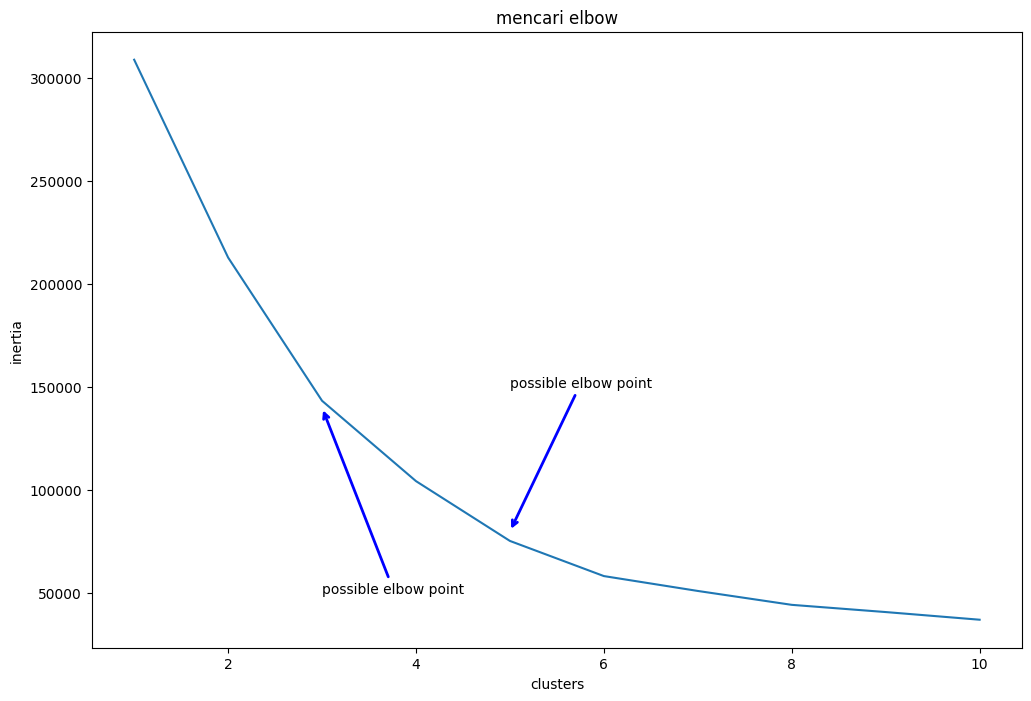

In [105]:
cluster=[]
for i in range(1,11):
    km =KMeans(n_clusters=i).fit(X)
    cluster.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=cluster, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

#panah elbow
ax.annotate('possible elbow point', xy=(3, 140000), xytext=(3, 50000),xycoords= 'data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('possible elbow point', xy=(5, 80000), xytext=(5, 150000),xycoords= 'data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

 # proses clustering

In [106]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


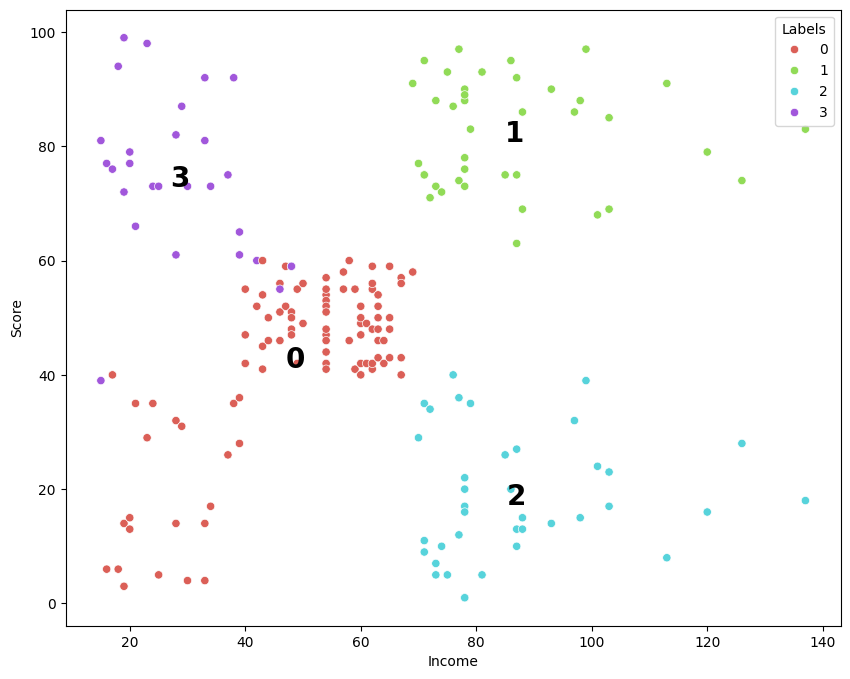

In [107]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income', y='Score', hue='Labels', data=X, palette=sns.color_palette('hls', n_clust))

for label in X['Labels'].unique():
    plt.annotate(label,
                 (X[X['Labels']==label]['Income'].mean(),
                  X[X['Labels']==label]['Score'].mean()),
                  horizontalalignment='center',
                  verticalalignment='center',
                  size=20, weight='bold',
                  color='black')


In [108]:
print(X)

     Age  Income  Score  Labels
0     19      15     39       3
1     21      15     81       3
2     20      16      6       0
3     23      16     77       3
4     31      17     40       0
..   ...     ...    ...     ...
195   35     120     79       1
196   45     126     28       2
197   32     126     74       1
198   32     137     18       2
199   30     137     83       1

[200 rows x 4 columns]


In [109]:
X.to_excel("output_cluster.xlsx")

ModuleNotFoundError: No module named 'openpyxl'